# Pillow Library (PIL)

学习目标

计算机视觉任务包括显示、裁剪、翻转、旋转、图像分割、分类、影像复原、图像识别、图像生成。Python 是一个很好的选择，因为它有许多图像处理工具，计算机视觉和人工智能库。数字图像只是计算机中的一个文件。在这个实验室，您将获得对这些文件的理解，并学习使用库PIL。

Python 图像处理库
- 绘制一张图片
- 灰度图像
- 量化图像和颜色通道
- 把图像转换为Numpy数组

## 图片文件和路径

图像作为一个文件存储在电脑中。我们定义这个目录下的文件的文件名是`my_image`。文件名由两部分组成: 文件名和扩展名，中间用一个句号(.)分隔.扩展指定 Image 的格式。有两种流行的图像格式: `.JPG``.Jpeg``.png` 这些文件类型使得处理图像更加简单。例如，它压缩图像，在驱动器上占用较少的空间来存储图像。

In [1]:
my_image = "fish.png"

In [2]:
image_path = "fish.png"

### 用Python加载图像

Pillow (PIL)库是一个用于在 Python 中加载图像的流行库。此外，许多其他库，如“ Kera”和“ PyTorch”使用此库处理图像。`Image` 模块提供了从文件系统加载图像并将图像保存到文件系统的功能。让我们从 `PIL`导入它

In [3]:
from PIL import Image
image = Image.open(my_image) 
#创建一个图片对象
type(image)

PIL.PngImagePlugin.PngImageFile

### 绘制图片

用`matplotlib`库中的`imshow`方法展示图片

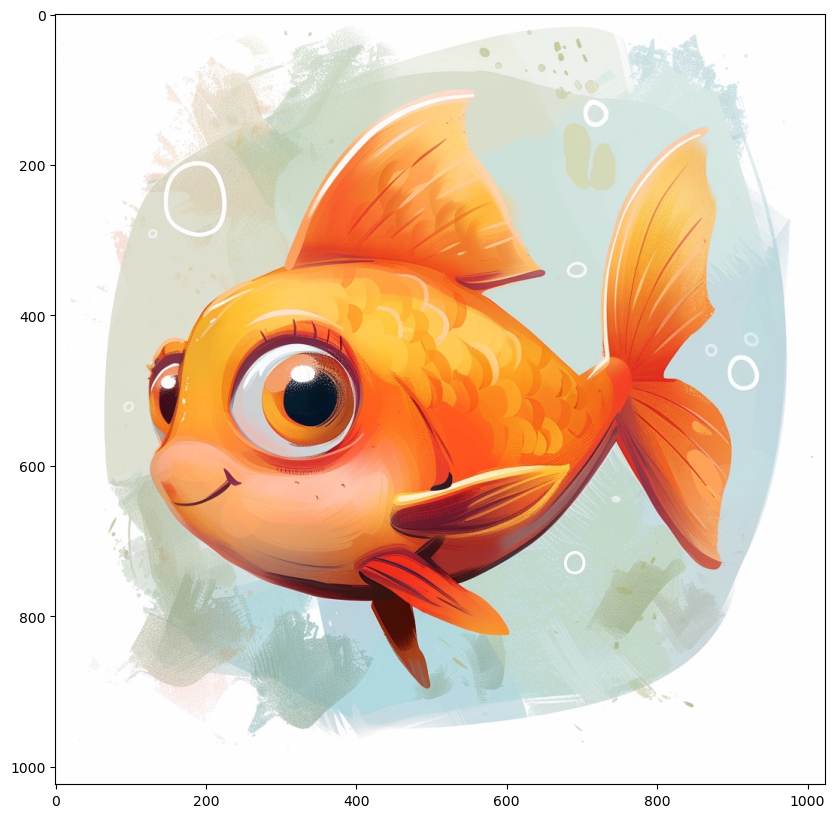

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

In [5]:
image.size

(1024, 1024)

In [6]:
image.mode

'RGB'

`Image.open`方法不将图像数据加载到计算机内存中。`PIL`对象`load`方法,读取文件内容，对其进行解码，并将图像扩展到内存中。

In [7]:
im = image.load()
x = 0
y = 1
im[y,x]

(254, 254, 254)

In [8]:
image.save("fish.jpg")

## 灰度图片、量化、颜色通道

### 灰度图片

`ImageOps`模块包含了几种现成的图像处理操作。该模块有些实验性，大多数操作仅适用于灰度和/或RGB图像。灰度图像的像素值表示该像素的光量或强度。浅灰色具有高亮度，而深灰色则亮度较低，即白色具有最高亮度，黑色具有最低亮度。

In [9]:
from PIL import ImageOps
image_gray = ImageOps.grayscale(image)
image_gray.mode

'L'

### 量化

图像的量化是指图像中任意给定像素可以具有的唯一强度值的数量。对于灰度图像而言，这意味着不同灰度级别的数量。大多数图像有256个不同的灰度级。使用quantize方法减少灰度级别。让我们反复将灰度级数量减半并观察会发生什么：

In [ ]:
#图片变灰
image_gray.quantize(256//2)
image_gray.show()

### 颜色通道

In [11]:
# 让我们定义一个 helper 函数拼接两个图像
def get_concat_h(im1, im2):
    #https://note.nkmk.me/en/python-pillow-concat-images/
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

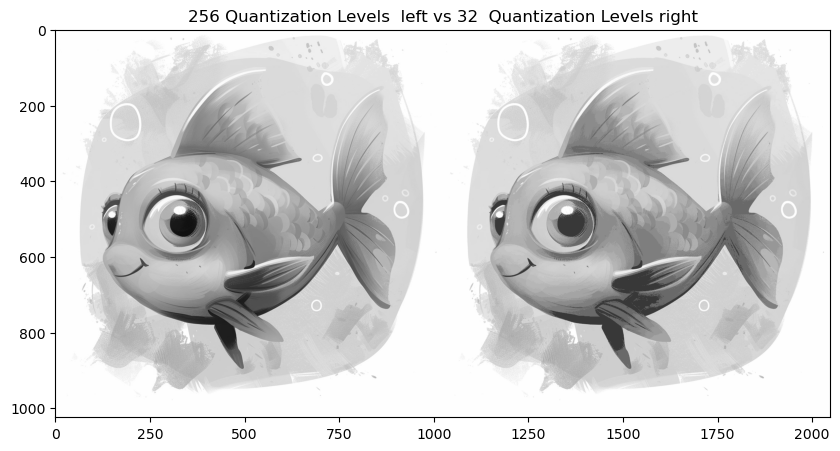

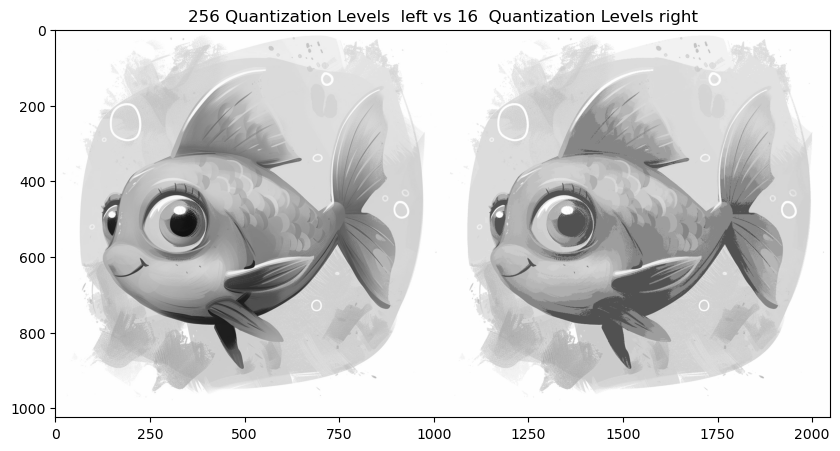

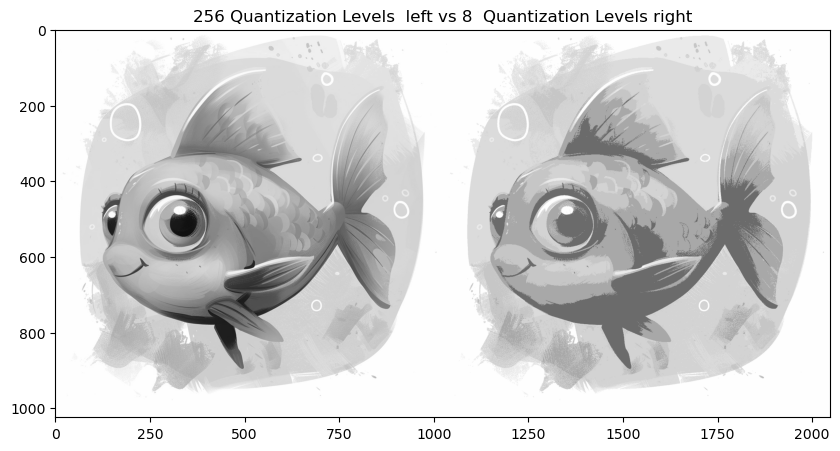

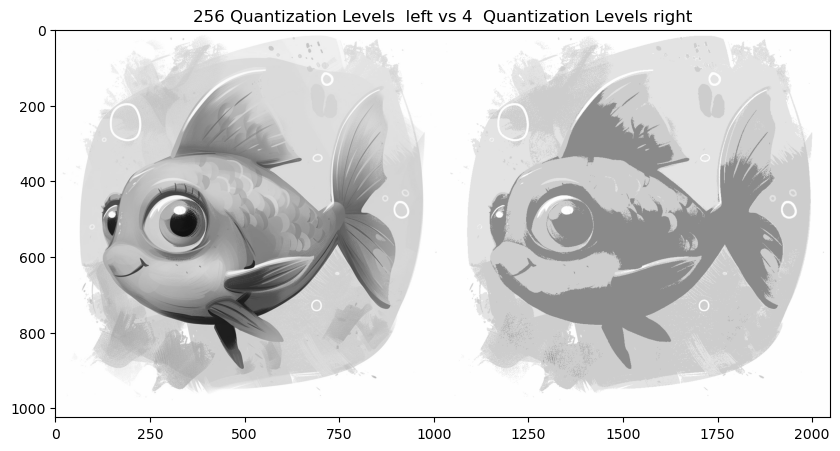


KeyboardInterrupt



In [12]:
#get_concat_h(image_gray,  image_gray.quantize(256//2)).show(title="Lena") 
for n in range(3,8):
    plt.figure(figsize=(10,10))

    plt.imshow(get_concat_h(image_gray,  image_gray.quantize(256//2**n)))  #灰度值除以2，并将其与原始图像进行比较。
    plt.title("256 Quantization Levels  left vs {}  Quantization Levels right".format(256//2**n))
    plt.show()

In [ ]:
# 获取不同的RGB颜色通道，并将它们分配给变量red（红色）、green（绿色）和blue（蓝色）
red,green,blue = image.split()
#将红色通道旁边的彩色图像绘制成灰度图，我们可以看到红色区域具有更高的亮度值。
get_concat_h(image,red) 

In [ ]:
get_concat_h(image, blue)

In [ ]:
get_concat_h(image, green)

### PIL图像 转换为NumPy数组

NumPy 是一个 Python 库，允许您使用多维数组和矩阵。我们可以将 PIL 图像转换为 NumPy 数组。我们使用来自 NumPy 的 asarray()或 array函数将 PIL 图像转换为 NumPy 数组。

In [ ]:
import numpy as np 
array = np.asarray(image)
type(array) 

 `np.asarray` 将原始图像转换为一个 numpy 数组。通常，我们不想直接操作图像，而是创建一个要操作的图像副本。`np.rray` 方法创建图像的一个新副本，这样原始副本将保持不变。

`numpy.array`对象`shape`能返回一个tuple `(rows,columns,colors)`，表达它的尺寸，第一个元素给出图像的行数或高度，第二个元素是图像的列数或宽度。最后一个元素是彩色通道的数量。
颜色轴上的每个元素对应数值`(R,G,B)` ，通过输出array 我们可以看到intensity values,是0~255的数字

In [ ]:
array

In [ ]:
array.min() #minimum intensity value of the array
array.max()#maximum intensity value of the array